## Cyclistic Analysis

#### Goal of the Analysis
> Converting casual riders into annual members

#### Sources of Data
> The data has been made available by Motivate International Inc

#### Questions to Address
> How do annual members and casual riders use Cyclistic bikes differently?

> How can Cyclistic use digital media to influence casual riders to become members?


#### Limitation

* There was no sufficient data such as the actual cost of cyclist tickets on the bikes.

* Most of the variables in the dataset are string types, which do not allow a high level statistical method to be conducted.

* The readable bike type avaliable in the data set is docked_bike. there is no other varities so as to compare.

* Their is no enough data to look at the other factor affecting the why members still remain members and why casuals still remain casuals Cyclistic

* insufficient data to look at the other factor affecting Why would casual riders buy Cyclistic annual memberships?

### Data Wrangling

In [2]:
# importing the necessary packages for the analysis.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline 

In [3]:
# loading the data set.

df = pd.read_csv('202004-divvy-tripdata.csv')
df_2 = pd.read_csv('202006-divvy-tripdata.csv')

In [4]:
# joining the two data set together.

df = df.append(df_2)

In [5]:
# making Visual assessment through random sampling of the data.

df.sample(10)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
210053,3B91582052EFB1FC,docked_bike,2020-06-19 12:49:04,2020-06-19 13:06:20,Kingsbury St & Kinzie St,133,Wood St & Milwaukee Ave,61.0,41.889177,-87.638506,41.907655,-87.672552,casual
187463,707B35E67972CCCF,docked_bike,2020-06-27 17:50:59,2020-06-27 18:24:00,Mies van der Rohe Way & Chestnut St,145,Seeley Ave & Roscoe St,308.0,41.898586,-87.621915,41.943403,-87.679618,member
53269,72B1941BD4CFC757,docked_bike,2020-06-19 23:55:35,2020-06-20 00:18:18,Sheffield Ave & Wellington Ave,115,Peoria St & Jackson Blvd,134.0,41.936266,-87.652662,41.877642,-87.649618,casual
59260,81DFFD52029526AD,docked_bike,2020-06-22 19:11:30,2020-06-22 19:19:29,Orleans St & Hubbard St,636,Wells St & Walton St,46.0,41.890028,-87.636618,41.899930,-87.634430,member
312740,4480486D951D06BC,docked_bike,2020-06-27 10:43:24,2020-06-27 10:54:38,Delano Ct & Roosevelt Rd,626,Wentworth Ave & Cermak Rd,120.0,41.867491,-87.632190,41.853085,-87.631931,member
139902,E12BD397198D968F,docked_bike,2020-06-27 11:56:38,2020-06-27 13:01:39,State St & Pearson St,106,Rush St & Cedar St,172.0,41.897448,-87.628722,41.902309,-87.627691,member
114533,171BF958807A69F0,docked_bike,2020-06-28 13:54:14,2020-06-28 14:09:43,Wentworth Ave & Cermak Rd,120,Halsted St & Polk St,108.0,41.853084,-87.631931,41.871840,-87.646640,member
28314,E46D9DC516E1472C,docked_bike,2020-04-04 11:22:36,2020-04-04 11:32:03,Sheffield Ave & Willow St,93,Clark St & Schiller St,301.0,41.913700,-87.652900,41.908000,-87.631500,member
334107,CC17B22397602CC2,docked_bike,2020-06-17 08:12:44,2020-06-17 08:18:14,Kimbark Ave & 53rd St,322,Lake Park Ave & 56th St,345.0,41.799568,-87.594747,41.793242,-87.587782,member
310587,FA79D196D193A504,docked_bike,2020-06-13 17:32:09,2020-06-13 17:46:38,Broadway & Barry Ave,300,Sheffield Ave & Webster Ave,327.0,41.937582,-87.644097,41.921540,-87.653818,casual


In [6]:
# checking the data tpyes

df.dtypes

ride_id                object
rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id        int64
end_station_name       object
end_station_id        float64
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [7]:
# Converting columns data types to Date Data type.

df['started_at'] = df['started_at'].astype('datetime64[ns]')
df['ended_at'] = df['ended_at'].astype('datetime64[ns]')

In [8]:
# Confirming the data types conversion.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 427781 entries, 0 to 343004
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             427781 non-null  object        
 1   rideable_type       427781 non-null  object        
 2   started_at          427781 non-null  datetime64[ns]
 3   ended_at            427781 non-null  datetime64[ns]
 4   start_station_name  427781 non-null  object        
 5   start_station_id    427781 non-null  int64         
 6   end_station_name    427214 non-null  object        
 7   end_station_id      427214 non-null  float64       
 8   start_lat           427781 non-null  float64       
 9   start_lng           427781 non-null  float64       
 10  end_lat             427214 non-null  float64       
 11  end_lng             427214 non-null  float64       
 12  member_casual       427781 non-null  object        
dtypes: datetime64[ns](2), float64

In [9]:
# Getting the time, latitude and longitude lenght/difference.

lat_length =  df['end_lat'] - df['start_lat']

lng_length =  df['end_lng'] - df['start_lng']

ride_length =  df['ended_at'] - df['started_at']

df['ride_length'] = ride_length

df['lat_length'] = lat_length

df['lng_length'] = lng_length

In [10]:
# confirming the new columns for the length

df.sample(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,lat_length,lng_length
92803,925E2C4E506A2E10,docked_bike,2020-06-17 22:09:54,2020-06-17 23:08:22,Cottage Grove Ave & 43rd St,271,Cottage Grove Ave & 43rd St,271.0,41.816499,-87.606582,41.816499,-87.606582,casual,0 days 00:58:28,0.000000,0.000000
117552,1C431CDFBB8A1E86,docked_bike,2020-06-19 22:45:42,2020-06-20 08:37:56,Southport Ave & Wrightwood Ave,190,Ashland Ave & Wrightwood Ave,166.0,41.928773,-87.663913,41.928830,-87.668507,casual,0 days 09:52:14,0.000057,-0.004594
124153,3949F97CCB1B4609,docked_bike,2020-06-04 11:38:03,2020-06-04 11:46:24,Michigan Ave & Lake St,52,Dearborn St & Van Buren St,624.0,41.886024,-87.624117,41.876268,-87.629155,member,0 days 00:08:21,-0.009756,-0.005038
211949,D790623B7261C3BE,docked_bike,2020-06-30 08:19:12,2020-06-30 08:30:24,Clinton St & Jackson Blvd,638,Throop (Loomis) St & Taylor St,19.0,41.878116,-87.639838,41.868968,-87.659141,casual,0 days 00:11:12,-0.009148,-0.019303
53083,8CB087D15F10E5AC,docked_bike,2020-06-19 07:47:51,2020-06-19 08:05:17,Michigan Ave & 14th St,168,Wood St & Taylor St,317.0,41.864059,-87.623727,41.869154,-87.671045,casual,0 days 00:17:26,0.005095,-0.047318


In [11]:
# converting the start_at to weekdays; where 0 = Sunday and 6 = Saturday

df['weekday'] = df['started_at'].dt.weekday

In [12]:
# checking

df.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,lat_length,lng_length,weekday
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.8964,-87.6610,41.9322,-87.6586,member,0 days 00:26:49,0.0358,0.0024,6
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.9244,-87.7154,41.9306,-87.7238,member,0 days 00:08:09,0.0062,-0.0084,4
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.8945,-87.6179,41.8679,-87.6230,member,0 days 00:14:23,-0.0266,-0.0051,2
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.9030,-87.6975,41.8992,-87.6722,member,0 days 00:12:12,-0.0038,0.0253,1
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.8902,-87.6262,41.9695,-87.6547,casual,0 days 00:52:55,0.0793,-0.0285,5


In [13]:
# Dropping off the unused column.

df = df.drop(['start_station_id', 'start_lat', 'start_lng', 'started_at','end_lat','ended_at','start_station_id', 'end_station_id', 'end_lng', 'ride_id'],axis= 1)

In [14]:
# copy the file

df_copy = df.copy()

df_copy

,rideable_type,start_station_name,end_station_name,member_casual,ride_length,lat_length,lng_length,weekday
0,docked_bike,Eckhart Park,Lincoln Ave & Diversey Pkwy,member,0 days 00:26:49,0.035800,0.002400,6
1,docked_bike,Drake Ave & Fullerton Ave,Kosciuszko Park,member,0 days 00:08:09,0.006200,-0.008400,4
2,docked_bike,McClurg Ct & Erie St,Indiana Ave & Roosevelt Rd,member,0 days 00:14:23,-0.026600,-0.005100,2
3,docked_bike,California Ave & Division St,Wood St & Augusta Blvd,member,0 days 00:12:12,-0.003800,0.025300,1
4,docked_bike,Rush St & Hubbard St,Sheridan Rd & Lawrence Ave,casual,0 days 00:52:55,0.079300,-0.028500,5
...,...,...,...,...,...,...,...,...
343000,docked_bike,Western Ave & Division St,Canal St & Jackson Blvd,member,0 days 00:24:08,-0.025648,0.047909,1
343001,docked_bike,Broadway & Cornelia Ave,Wells St & Concord Ln,casual,0 days 00:22:18,-0.033396,0.011783,5
343002,docked_bike,Kingsbury St & Kinzie St,Clark St & Lincoln Ave,casual,0 days 00:16:49,0.026513,0.003905,1
343003,docked_bike,Canal St & Jackson Blvd,Stetson Ave & South Water St,casual,0 days 00:12:33,0.009590,0.017046,2


In [15]:
# mapping the weekdays with str values by dictionary, else get NaNs for not matched values:

df_copy['weekday'] = df_copy['weekday'].map({0:'sunday', 1:'monday', 2:'tuesday', 3:'wednesday', 4:'thursday', 5:'friday', 6:'saturday' }) 

In [16]:
df_copy

,rideable_type,start_station_name,end_station_name,member_casual,ride_length,lat_length,lng_length,weekday
0,docked_bike,Eckhart Park,Lincoln Ave & Diversey Pkwy,member,0 days 00:26:49,0.035800,0.002400,saturday
1,docked_bike,Drake Ave & Fullerton Ave,Kosciuszko Park,member,0 days 00:08:09,0.006200,-0.008400,thursday
2,docked_bike,McClurg Ct & Erie St,Indiana Ave & Roosevelt Rd,member,0 days 00:14:23,-0.026600,-0.005100,tuesday
3,docked_bike,California Ave & Division St,Wood St & Augusta Blvd,member,0 days 00:12:12,-0.003800,0.025300,monday
4,docked_bike,Rush St & Hubbard St,Sheridan Rd & Lawrence Ave,casual,0 days 00:52:55,0.079300,-0.028500,friday
...,...,...,...,...,...,...,...,...
343000,docked_bike,Western Ave & Division St,Canal St & Jackson Blvd,member,0 days 00:24:08,-0.025648,0.047909,monday
343001,docked_bike,Broadway & Cornelia Ave,Wells St & Concord Ln,casual,0 days 00:22:18,-0.033396,0.011783,friday
343002,docked_bike,Kingsbury St & Kinzie St,Clark St & Lincoln Ave,casual,0 days 00:16:49,0.026513,0.003905,monday
343003,docked_bike,Canal St & Jackson Blvd,Stetson Ave & South Water St,casual,0 days 00:12:33,0.009590,0.017046,tuesday


In [18]:
# dropping of the null values

df_copy.dropna()

,rideable_type,start_station_name,end_station_name,member_casual,ride_length,lat_length,lng_length,weekday
0,docked_bike,Eckhart Park,Lincoln Ave & Diversey Pkwy,member,0 days 00:26:49,0.035800,0.002400,saturday
1,docked_bike,Drake Ave & Fullerton Ave,Kosciuszko Park,member,0 days 00:08:09,0.006200,-0.008400,thursday
2,docked_bike,McClurg Ct & Erie St,Indiana Ave & Roosevelt Rd,member,0 days 00:14:23,-0.026600,-0.005100,tuesday
3,docked_bike,California Ave & Division St,Wood St & Augusta Blvd,member,0 days 00:12:12,-0.003800,0.025300,monday
4,docked_bike,Rush St & Hubbard St,Sheridan Rd & Lawrence Ave,casual,0 days 00:52:55,0.079300,-0.028500,friday
...,...,...,...,...,...,...,...,...
343000,docked_bike,Western Ave & Division St,Canal St & Jackson Blvd,member,0 days 00:24:08,-0.025648,0.047909,monday
343001,docked_bike,Broadway & Cornelia Ave,Wells St & Concord Ln,casual,0 days 00:22:18,-0.033396,0.011783,friday
343002,docked_bike,Kingsbury St & Kinzie St,Clark St & Lincoln Ave,casual,0 days 00:16:49,0.026513,0.003905,monday
343003,docked_bike,Canal St & Jackson Blvd,Stetson Ave & South Water St,casual,0 days 00:12:33,0.009590,0.017046,tuesday


In [21]:
## drop off duplicates.

df_copy.drop_duplicates(inplace=True)

In [22]:
# copying of the file again because i want to split the data frame into member and casual data

df_copy_2 = df_copy.copy()

In [23]:
# grouping into different members

df_member = df_copy_2[df_copy_2['member_casual']== 'member']
df_casual = df_copy_2[df_copy_2['member_casual']== 'casual']

In [24]:
# confirming the grouping

df_member.head(3)

,rideable_type,start_station_name,end_station_name,member_casual,ride_length,lat_length,lng_length,weekday
0,docked_bike,Eckhart Park,Lincoln Ave & Diversey Pkwy,member,0 days 00:26:49,0.0358,0.0024,saturday
1,docked_bike,Drake Ave & Fullerton Ave,Kosciuszko Park,member,0 days 00:08:09,0.0062,-0.0084,thursday
2,docked_bike,McClurg Ct & Erie St,Indiana Ave & Roosevelt Rd,member,0 days 00:14:23,-0.0266,-0.0051,tuesday


In [25]:
# confirming the grouping

df_casual.head(3)

,rideable_type,start_station_name,end_station_name,member_casual,ride_length,lat_length,lng_length,weekday
4,docked_bike,Rush St & Hubbard St,Sheridan Rd & Lawrence Ave,casual,0 days 00:52:55,0.0793,-0.0285,friday
7,docked_bike,Ogden Ave & Roosevelt Rd,Western Ave & Congress Pkwy,casual,0 days 01:15:49,0.0082,-0.0017,monday
8,docked_bike,LaSalle Dr & Huron St,Larrabee St & Division St,casual,0 days 00:05:44,0.0086,-0.0111,tuesday


## Analysis

> ### Descriptive Analysis

In [ ]:
### df_copy.sort('start_station_name').count()

In [26]:
# general descriptive anaysis on data set

df_copy.describe()

,ride_length,lat_length,lng_length
count,426172,425605.000000,425605.000000
mean,0 days 00:34:03.215232347,0.000185,-0.000322
std,0 days 05:36:38.959695086,0.023171,0.019320
min,-1 days +23:55:57,-0.199352,-0.154925
25%,0 days 00:09:54,-0.010300,-0.009411
50%,0 days 00:17:49,0.000000,0.000000
75%,0 days 00:30:12,0.010632,0.008711
max,40 days 18:40:02,0.241480,0.149769


##### Insights:

The minimum ride length for ride length is 23:57:04, mean time is 00:34:03, and the maximum ride length is 40 days 18:40:02	

The minimum value for lat_length is 0.199352, mean length is 0.000185, and the maximum lat_length is 0.241480.

The minimum value for lng_length is 0.154925, mean length is 0.000322, and the maximum lng_length is 0.149769.

In [27]:
df_casual.describe()

,ride_length,lat_length,lng_length
count,177559,177310.000000,177310.000000
mean,0 days 00:54:33.896727285,0.000184,-0.000389
std,0 days 07:43:09.960888130,0.023688,0.019406
min,-1 days +23:58:02,-0.199352,-0.154925
25%,0 days 00:14:12,-0.009016,-0.008555
50%,0 days 00:24:43,0.000000,0.000000
75%,0 days 00:46:22,0.009689,0.007478
max,38 days 16:03:53,0.241480,0.149769


##### Insights:

The minimum value for ride length is 23:58, mean time is 00:54:33, and the maximum ride length is 38 days 16:03:53.	

The minimum value for lat_length is 0.199352, mean length is 0.000184, and the maximum lat_length is 0.241480.

The minimum value for lng_length is 0.154925, mean length is 0.000389, and the maximum lng_length is 0.149769.

## Data Visualisation

<AxesSubplot:xlabel='member_casual', ylabel='count'>

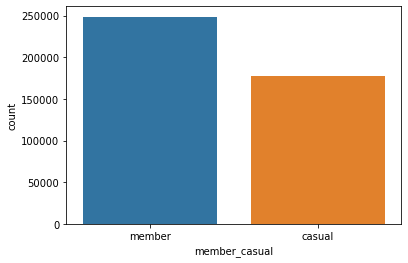

In [28]:
# bar of members to casual

sns.countplot(data=df_copy, x='member_casual')

The chart above shows that the bike company has more customers which are members than the causal members.

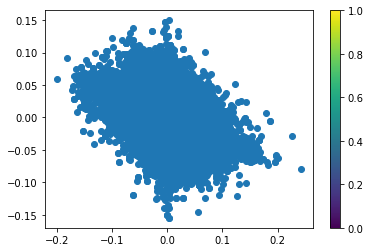

In [67]:
# Ploting of scatter plot on lat_lenght and lng_length

plt.scatter(data=df_copy, x='lat_length', y='lng_length')
plt.colorbar()

The chart shows a negative relationship between the longitutde and latitude difference.

### Question 1 (How do annual members and casual riders use Cyclistic bikes differently?)

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'saturday'),
  Text(1, 0, 'friday'),
  Text(2, 0, 'wednesday'),
  Text(3, 0, 'monday'),
  Text(4, 0, 'thursday'),
  Text(5, 0, 'tuesday'),
  Text(6, 0, 'sunday')])

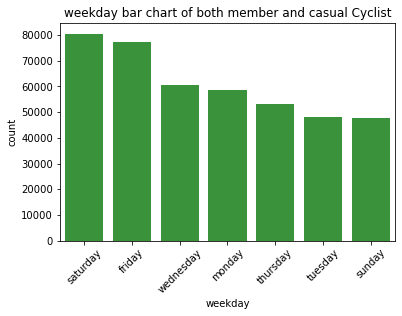

In [30]:
# Plotting of weekday bar chart of both member and casual

type_order = df_copy['weekday'].value_counts().index
colorbase = sns.color_palette()[2]
sns.countplot(data=df_copy,x='weekday', color=colorbase, order=type_order)
plt.title('weekday bar chart of both member and casual Cyclist')
plt.xticks(rotation='45')

The bar chart shows that both the member and casual Cyclist ride bike mostly on weekends especially on saturday than other week days.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'saturday'),
  Text(1, 0, 'friday'),
  Text(2, 0, 'wednesday'),
  Text(3, 0, 'monday'),
  Text(4, 0, 'thursday'),
  Text(5, 0, 'tuesday'),
  Text(6, 0, 'sunday')])

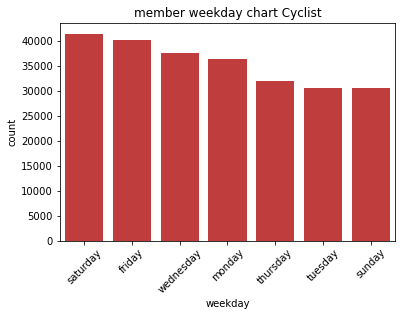

In [32]:
# bar plot of member weekday

type_order_1 = df_member['weekday'].value_counts().index
color_base = sns.color_palette()[3]
sns.countplot(data=df_member,x='weekday', color=color_base, order= type_order_1)
plt.title('member weekday chart Cyclist')
plt.xticks(rotation='45')

The bar chart shows that member Cyclist ride uses bikes throughout the week days but more especially on weekends than other week days.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'saturday'),
  Text(1, 0, 'friday'),
  Text(2, 0, 'wednesday'),
  Text(3, 0, 'monday'),
  Text(4, 0, 'thursday'),
  Text(5, 0, 'tuesday'),
  Text(6, 0, 'sunday')])

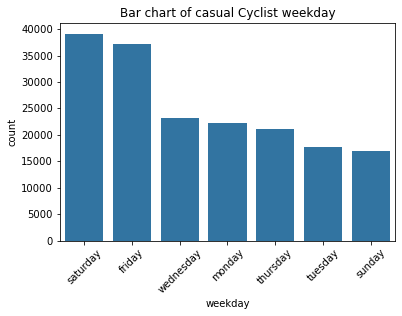

In [37]:
# bar plot of casual weekday

type_order_2 = df_casual['weekday'].value_counts().index
color_3 = sns.color_palette()[0]
sns.countplot(data=df_casual,x='weekday', color=color_3, order=type_order_2)
plt.title('Bar chart of casual Cyclist weekday')
plt.xticks(rotation='45')

The bar chart shows that casual Cyclist ride bike mostly on weekends especially on saturday than other week days.

#### Start and End station that is frequently used

Text(0.5, 1.0, 'Start_station_name Bar chart for both Casual and member cyclist')

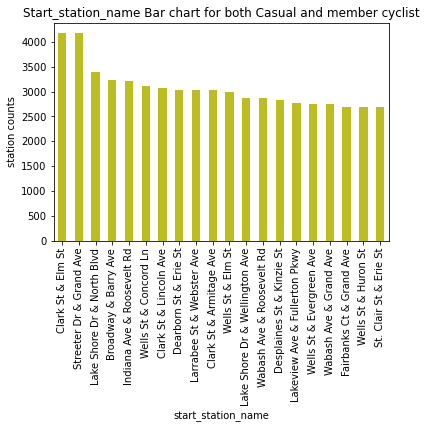

In [110]:
# start_station_name Bar chart for both Casual and member cyclist  

color_4 = sns.color_palette()[8]
df_copy['start_station_name'].value_counts().head(20).plot(kind='bar', color=color_4)
plt.xlabel('start_station_name')
plt.ylabel('station counts')
plt.title('Start_station_name Bar chart for both Casual and member cyclist')

The bar chart shows that both the member and Casual cyclist start their ride at Streeter Dr & Grand Ave and Clark St & Elm station 

Text(0.5, 1.0, 'End_station_name Bar chart for both Casual and member cyclist')

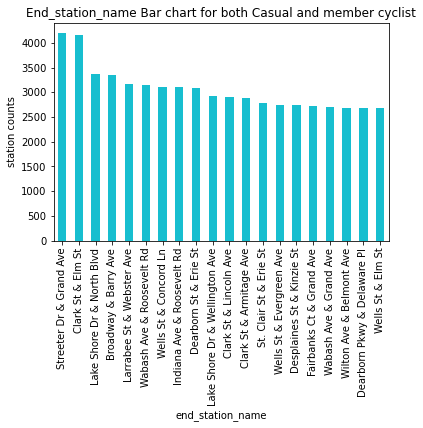

In [103]:
# end_station_name Bar chart for both Casual and member cyclist 

color_5 = sns.color_palette()[9]
df_copy['end_station_name'].value_counts().head(20).plot(kind='bar', color=color_5)
plt.xlabel('end_station_name')
plt.ylabel('station counts')
plt.title('End_station_name Bar chart for both Casual and member cyclist')

The bar chart shows that both casual and member cyclist end their ride at Streeter Dr & Grand Ave and Clark St & Elm station

Text(0.5, 1.0, 'Casual cyclist start station bar chart')

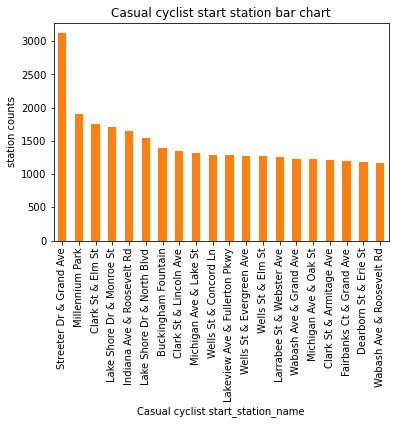

In [106]:
# casual cyclist start station bar chart

color_6 = sns.color_palette()[1]
df_casual['start_station_name'].value_counts().head(20).plot(kind='bar', color=color_6)
plt.xlabel('Casual cyclist start_station_name')
plt.ylabel('station counts')
plt.title('Casual cyclist start station bar chart')

The bar chart shows that most Casual cyclist start their ride at Streeter Dr & Grand Ave station 

Text(0.5, 1.0, 'Casual cyclist end station bar chart')

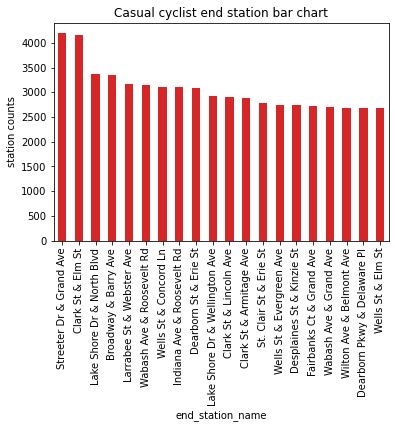

In [109]:
# Casual cyclist end_station_name

color_7= sns.color_palette()[3]
df_copy['end_station_name'].value_counts().head(20).plot(kind='bar', color=color_7)
plt.xlabel('end_station_name')
plt.ylabel('station counts')
plt.title('Casual cyclist end station bar chart')

The bar chart shows that most Casual cyclist end their ride at Streeter Dr & Grand Ave and Clark St & Elm station

#### Start and End station that is not frequently used by casual cyclist

Text(0.5, 1.0, 'Casual cyclist start station that is not frequently used')

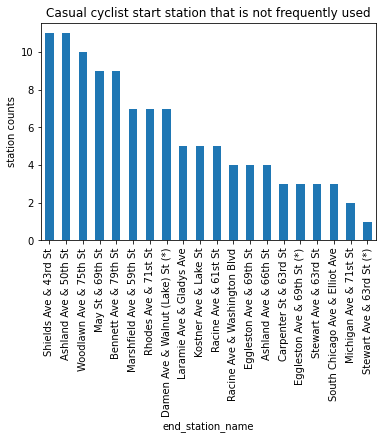

In [50]:
# Casual cyclist start station that is not frequently used.

color_7= sns.color_palette()[0]
df_copy['start_station_name'].value_counts().tail(20).plot(kind='bar', color=color_7)
plt.xlabel('end_station_name')
plt.ylabel('station counts')
plt.title('Casual cyclist start station that is not frequently used')

The bar chart shows that Casual cyclist is less likely to start their ride at Stewart Ave & 63rd station

In [51]:
# Casual cyclist start station that is not frequently used.

color_7= sns.color_palette()[4]
df_copy['end_station_name'].value_counts().tail(20).plot(kind='bar', color=color_7)
plt.xlabel('end_station_name')
plt.ylabel('station counts')
plt.title('Casual cyclist start station that is not frequently used')

Damen Ave & 51st St               11
Eggleston Ave & 69th St (*)       11
Woodlawn Ave & 75th St            10
Bennett Ave & 79th St              8
Michigan Ave & 71st St             7
Rhodes Ave & 71st St               6
Marshfield Ave & 59th St           6
Shields Ave & 43rd St              5
Carpenter St & 63rd St             5
Laramie Ave & Gladys Ave           4
Ashland Ave & 66th St              4
Racine Ave & 61st St               4
Stewart Ave & 63rd St (*)          3
Eggleston Ave & 69th St            3
Kostner Ave & Lake St              2
Stewart Ave & 63rd St              2
Racine Ave & Washington Blvd       2
South Chicago Ave & Elliot Ave     2
Elizabeth St & 59th St             1
Damen Ave & Walnut (Lake) St       1
Name: end_station_name, dtype: int64

The bar chart shows that Casual cyclist is less likely to end their ride at Elizabeth St & 59th St and Damen Ave & Walnut (Lake) station